Prac 1:Write a program to implement various activation function (Identity, Linear, Binary Step, Bipolar Step,Bell Shaped).

In [ ]:
import numpy as np

def binary_step(x):
    if x<0:
      return 0
    else:
      return 1
print(binary_step(5)) 
print(binary_step(-1))

def identity_activation(x):
    return x
input_vec = np.array([1.0, 2.0, 3.0])
output_vec = identity_activation(input_vec)
print(output_vec)

def linear_activation(x):
    return x
input_vec = np.array([1.0, 2.0, 3.0])
output_vec = linear_activation(input_vec)
print(output_vec)

def bipolar_Step(x):
    if x>=0:
      return 1
    else:
      return -1
print(bipolar_Step(3))
print(bipolar_Step(-2))

def gaussian_activation(x, a=1, c=0, w=1):
    return a * np.exp(-(x-c)*2 / (2*w*2))
input_vec = np.array([1.0, 2.0, 3.0])
output_vec = gaussian_activation(input_vec)
print(output_vec)



1
0
[1. 2. 3.]
[1. 2. 3.]
1
-1
[0.60653066 0.36787944 0.22313016]


SC prac2:Write suitable programs for implementing logic functions (AND, OR, NOT) using McCulloch-Pitts neuron.(Consider input and output binary data).

In [ ]:
def mp_and(x1, x2):
    weight1, weight2, theta = 1, 1, 2
    y_in = x1*weight1 + x2*weight2
    if y_in >= theta:
        return 1
    else:
        return 0

# OR function implementation
def mp_or(x1, x2):
    weight1, weight2, theta = 1, 1, 1
    y_in = x1*weight1 + x2*weight2
    if y_in >= theta:
        return 1
    else:
        return 0

# NOT function implementation
def mp_not(x1):
    weight1, theta = -1, 0
    y_in = x1*weight1
    if y_in >= theta:
        return 1
    else:
        return 0

print("Output of AND Function")
print(mp_and(0, 0))
print(mp_and(0, 1))
print(mp_and(1, 0))
print(mp_and(1, 1))

print("Output of OR Function")
print(mp_or(0, 0)) # Expected output: 0
print(mp_or(0, 1)) # Expected output: 1
print(mp_or(1, 0)) # Expected output: 1
print(mp_or(1, 1)) # Expected output: 1

print("Output of NOT Function")
print(mp_not(0)) # Expected output: 1
print(mp_not(1)) # Expected output: 0

Output of AND Function
0
0
0
1
Output of OR Function
0
1
1
1
Output of NOT Function
1
0


SC prac3:Write a program to classify the letters using Hebb learning rule.

In [ ]:
import numpy as np

# Define the input patterns for each letter
letter_A = np.array([[1,1,1,1,1],
                     [1,0,0,0,1],
                     [1,1,1,1,1],
                     [1,0,0,0,1],
                     [1,0,0,0,1]])

letter_B = np.array([[1,1,1,1,0],
                     [1,0,0,0,1],
                     [1,1,1,1,0],
                     [1,0,0,0,1],
                     [1,1,1,1,0]])

letter_C = np.array([[0,1,1,1,0],
                     [1,0,0,0,1],
                     [1,0,0,0,0],
                     [1,0,0,0,1],
                     [0,1,1,1,0]])

# Concatenate the input patterns into a single array
input_patterns = np.array([letter_A.flatten(), letter_B.flatten(), letter_C.flatten()])

# Initialize the weight matrix using the Hebb rule
weights = np.zeros((25,25))
for i in range(25):
    for j in range(25):
        if i == j:
            weights[i,j] = 0
        else:
            for pattern in input_patterns:
                weights[i,j] += pattern[i] * pattern[j]
            weights[i,j] /= len(input_patterns)

# Define the activation function (simple threshold function)
def activation(x):
    return 1 if x > 0 else 0

# Define a function to classify new input patterns using the trained weights
def classify(input_pattern, weights):
    y = np.zeros(25)
    for i in range(25):
        y[i] = np.dot(weights[i,:], input_pattern)
    output = np.array([activation(y_i) for y_i in y])
    return output

# Test the classification on a new input pattern
letter_D = np.array([[1,1,1,1,0],
                     [1,0,0,0,1],
                     [1,0,0,0,1],
                     [1,0,0,0,1],
                     [1,1,1,1,0]])
                     
output_D = classify(letter_D.flatten(), weights)
if np.array_equal(output_D, letter_B.flatten()):
    print("Input pattern classified as letter B")
else:
    print("Input pattern not recognized")

Input pattern not recognized


SC prac4:Write a program to implement single layer perceptron network.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4648 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9259


[0.2662440538406372, 0.9258999824523926]

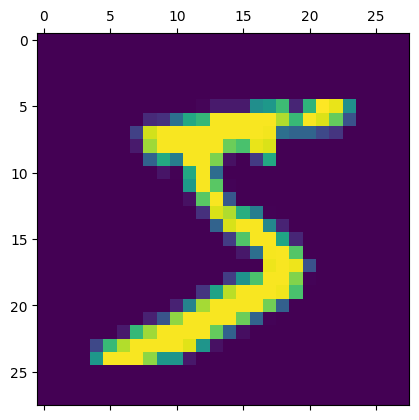

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])

# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255
  
# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  
model.fit(x_train_flatten, y_train, epochs=5)

model.evaluate(x_test_flatten, y_test)


SC Prac5:Write suitable programs for implementing Adaline network. (assume suitable input)

In [ ]:
# import the module numpy
import numpy as np
 
 
# the features for the or model , here we have
# taken the possible values for combination of
# two inputs
features = np.array(
    [
        [-1, -1],
        [-1, 1],
        [1, -1],
        [1, 1]
    ])
 
 
# labels for the or model, here the output for
# the features is taken as an array
labels = np.array([-1, 1, 1, 1])
 
# to print the features and the labels for
# which the model has to be trained
print(features, labels)
 
# initialise weights, bias , learning rate, epoch
weight = [0.5, 0.5]
bias = 0.1
learning_rate = 0.2
epoch = 5
 
for i in range(epoch):
   
    # epoch is the number of the model is trained
    # with the same data
    print("epoch :", i+1)
 
    # variable to check if there is no change in previous
    # weight and present calculated weight
    # initial error is kept as 0
    sum_squared_error = 0.0
 
    # for each of the possible input given in the features
    for j in range(features.shape[0]):
 
        # actual output to be obtained
        actual = labels[j]
 
        # the value of two features as given in the features
        # array
        x1 = features[j][0]
        x2 = features[j][1]
 
        # net unit value computation performed to obtain the
        # sum of features multiplied with their weights
        unit = (x1 * weight[0]) + (x2 * weight[1]) + bias
 
        # error is computed so as to update the weights
        error = actual - unit
 
        # print statement to print the actual value , predicted
        # value and the error
        print("error =", error)
 
        # summation of squared error is calculated
        sum_squared_error += error * error
 
        # updation of weights, summing up of product of learning rate ,
        # sum of squared error and feature value
        weight[0] += learning_rate * error * x1
        weight[1] += learning_rate * error * x2
 
        # updation of bias, summing up of product of learning rate and
        # sum of squared error
        bias += learning_rate * error
 
    print("sum of squared error = ", sum_squared_error/4, "\n\n")

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]] [-1  1  1  1]
epoch : 1
error = -0.09999999999999998
error = 0.9199999999999999
error = 1.1039999999999999
error = -0.5247999999999999
sum of squared error =  0.5876577599999998 


epoch : 2
error = -0.54976
error = 0.803712
error = 0.8172543999999999
error = -0.64406528
sum of squared error =  0.5077284689412096 


epoch : 3
error = -0.6729103360000002
error = 0.7483308032
error = 0.7399630438400001
error = -0.6898669486079996
sum of squared error =  0.5090672560860652 


epoch : 4
error = -0.7047962935296
error = 0.72625757847552
error = 0.7201693816586239
error = -0.7061914301759491
sum of squared error =  0.5103845399996764 


epoch : 5
error = -0.7124421954738586
error = 0.7182636328518943
error = 0.7154472043637898
error = -0.7117071786082882
sum of squared error =  0.5104670846209363 


